# Performing GMM
Now that we have our dataset, we can now perform GMM to cluster stocks based on the technical indicators.

In [16]:
tickers = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "LOW", "SBUX", "JD", "PDD", "BKNG", "GM", "MELI", "TJX", "NIO", "F", "LULU", "HMC", "CMG"]

In [17]:
import sys
import os

!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


We will first perform GMM on each stock individually based on its technical indicators, with the covariance type as full

Clustering on AMZN,TSLA,BABA,

/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


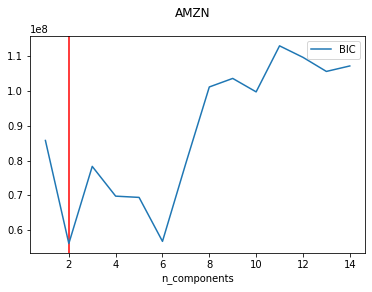

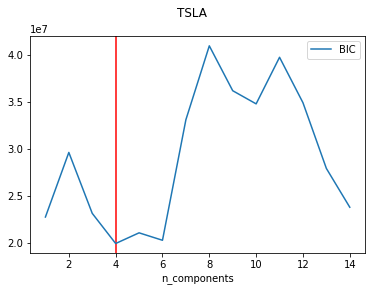

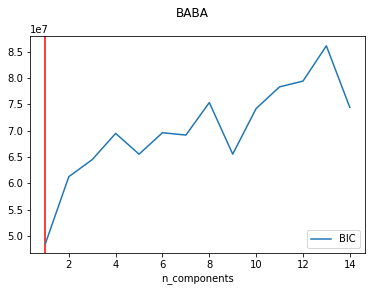

In [27]:
print("Clustering on", end=" ")
for i in range(len(tickers)):
    
    print(f"{tickers[i]}", end=',')

    # read in data from csv
    data = pd.read_csv(f'./data/{tickers[i]}.csv')

    # generate matrix with technical indicators (features) as columns
    features = data.to_numpy()[:, 6:]

    # normalize each feature
    scaler = StandardScaler()
    X = scaler.fit_transform(features)

    newPlot = plt.figure(i)
    newPlot.suptitle(tickers[i])
    n_components = np.arange(1, features.shape[1]+1)
    gmms = [GaussianMixture(n_components=k, covariance_type='full').fit(X) for k in n_components]
    
    bics = np.array([gmm.bic(X) for gmm in gmms])
    
    minidx = np.argmin(bics)
    centroids = gmms[minidx].means_

    # descale centroids
    centroids = scaler.inverse_transform(centroids)

    # create df for centroids
    centroids_df = pd.DataFrame(centroids, columns=data.columns[6:])
    if not os.path.exists("centroids"):
        os.mkdir("centroids")
    centroids_df.to_csv(f'./centroids/{tickers[i]}_centroids.csv')

    # plot the results
    plt.axvline(x=minidx + 1, color='r')
    plt.plot(n_components, bics, label='BIC')
    plt.legend(loc='best')
    plt.xlabel('n_components')

plt.show()
